# Análise exploratória do perfil de freelancers 


Neste notebook, faremos uma análise exploratória de um dataset sobre perfil de freelancers na área de tecnologia retirado do kaggle. Extrairemos insights a partir de perguntas previamente formuladas e tiraremos conclusões a partir desses insights.

**Perguntas a serem respondidas:**


- Perfil dos freelancers e sua relação com os ganhos
1. Quais categorias de trabalho geram os maiores e menores ganhos para os freelancers?
2. Como o nível de experiência impacta a média de ganhos e o sucesso nas plataformas? <br>
3. Qual a distribuição dos ganhos por hora entre freelancers? Existe alguma discrepância entre plataformas ou níveis de experiência? <br>
- Plataformas e modelos de contratação**
1. Qual plataforma oferece os melhores ganhos médios para freelancers?
2. Freelancers que trabalham com projetos por hora ganham mais do que os que trabalham com preço fixo? <br>
- Duração dos trabalhos e seu impacto**
1. Projetos mais longos resultam em maiores ganhos? Qual a relação entre Job_Duration_Days e Earnings_USD?
2. Existe alguma relação entre duração do projeto e taxa de sucesso ou satisfação dos clientes?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [3]:
df = pd.read_csv('../src/freelancer_earnings_bd.csv')

Primeiramente, vamos entender a estrutura do dataset, verificar se há valores nulos e entender a distribuição dos valores nas colunas numéricas.

In [4]:
df.head(3)

,Freelancer_ID,Job_Category,Platform,Experience_Level,Client_Region,Payment_Method,Job_Completed,Earnings_USD,Hourly_Rate,Job_Success_Rate,Client_Rating,Job_Duration_Days,Project_Type,Rehire_Rate,Marketing_Spend
0,1,Web Development,Fiverr,Beginner,Asia,Mobile Banking,180,1620,95.79,68.73,3.18,1,Fixed,40.19,53
1,2,App Development,Fiverr,Beginner,Australia,Mobile Banking,218,9078,86.38,97.54,3.44,54,Fixed,36.53,486
2,3,Web Development,Fiverr,Beginner,UK,Crypto,27,3455,85.17,86.60,4.20,46,Hourly,74.05,489


In [5]:
df.shape

(1950, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Freelancer_ID      1950 non-null   int64  
 1   Job_Category       1950 non-null   object 
 2   Platform           1950 non-null   object 
 3   Experience_Level   1950 non-null   object 
 4   Client_Region      1950 non-null   object 
 5   Payment_Method     1950 non-null   object 
 6   Job_Completed      1950 non-null   int64  
 7   Earnings_USD       1950 non-null   int64  
 8   Hourly_Rate        1950 non-null   float64
 9   Job_Success_Rate   1950 non-null   float64
 10  Client_Rating      1950 non-null   float64
 11  Job_Duration_Days  1950 non-null   int64  
 12  Project_Type       1950 non-null   object 
 13  Rehire_Rate        1950 non-null   float64
 14  Marketing_Spend    1950 non-null   int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 228.6+ KB


In [7]:
df.describe()

,Freelancer_ID,Job_Completed,Earnings_USD,Hourly_Rate,Job_Success_Rate,Client_Rating,Job_Duration_Days,Rehire_Rate,Marketing_Spend
count,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000
mean,975.500000,150.864103,5017.566667,52.579774,74.951846,3.995892,44.704615,44.556913,248.517436
std,563.060832,85.480770,2926.279918,26.927584,14.615735,0.575976,26.022998,20.193842,148.084581
min,1.000000,5.000000,51.000000,5.020000,50.160000,3.000000,1.000000,10.000000,0.000000
25%,488.250000,76.000000,2419.000000,30.047500,61.917500,3.510000,22.000000,27.150000,119.000000
50%,975.500000,149.000000,5048.000000,52.285000,75.400000,3.990000,45.000000,43.920000,252.500000
75%,1462.750000,225.000000,7608.250000,75.125000,87.537500,4.500000,67.000000,61.690000,379.000000
max,1950.000000,299.000000,9991.000000,99.830000,99.990000,5.000000,89.000000,79.950000,499.000000


Os dados não possuem valores nulos.

Verificando se há algum Freelancer duplicado:

In [8]:
df['Freelancer_ID'].nunique()

1950

Vamos primeiro entender o **Perfil dos freelancers e sua relação com os ganhos**

Antes de obter o  ganho médio por categoria de trabalho, vamos analisar se existem outliers que podem distorcer a média.

<Axes: xlabel='Job_Category', ylabel='Earnings_USD'>

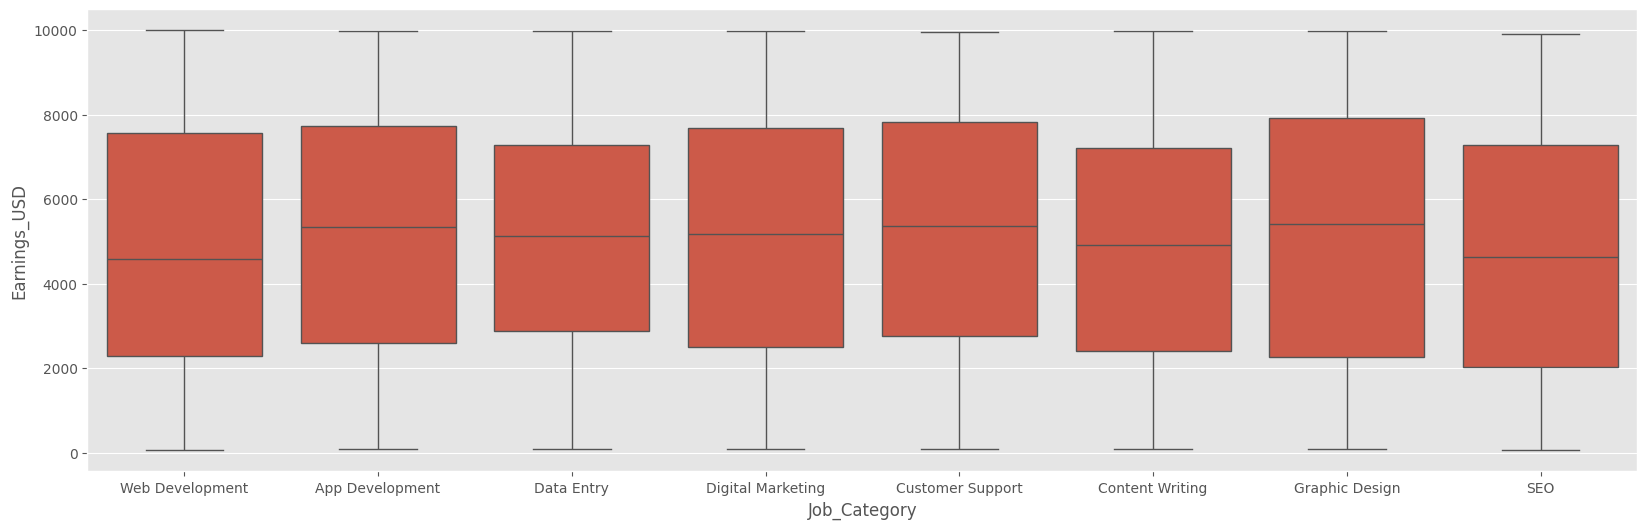

In [9]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Job_Category', y='Earnings_USD', data=df)

Os números de ganhos em USD são bem distribuídos e não possuem outliers.

Dessa forma, podemos utilizar a média de ganhos por categoria de trabalho para identificar as categorias que mais pagam.

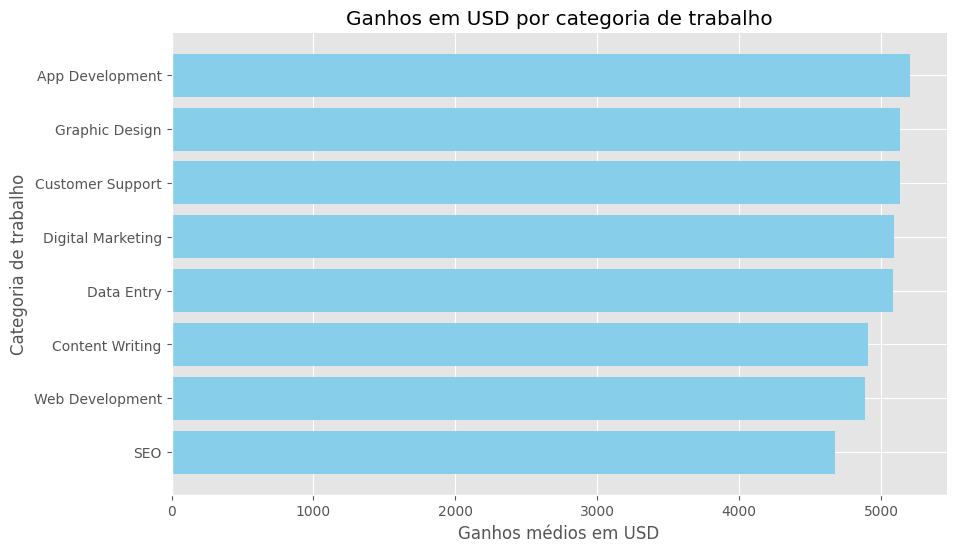

In [10]:
_ = df.groupby('Job_Category')['Earnings_USD'].mean().sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(_.index, _.values, color='skyblue')
plt.title('Ganhos em USD por categoria de trabalho')
plt.ylabel('Categoria de trabalho')
plt.xlabel('Ganhos médios em USD')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Podemos dizer que a categoria de trabalho que obtém mais ganhos em média é a App Development. Por outro lado, a que obtém menos ganhos em média é a  de SEO.

Agora, vamos responder à pergunta: **Como o nível de experiência impacta a média de ganhos e o sucesso nas plataformas?**

Primeiramente, vamos, por precaução, analisar a coluna 'Job_Success_Rate' para entender se há outliers que distorçam a média.

<Axes: xlabel='Experience_Level', ylabel='Job_Success_Rate'>

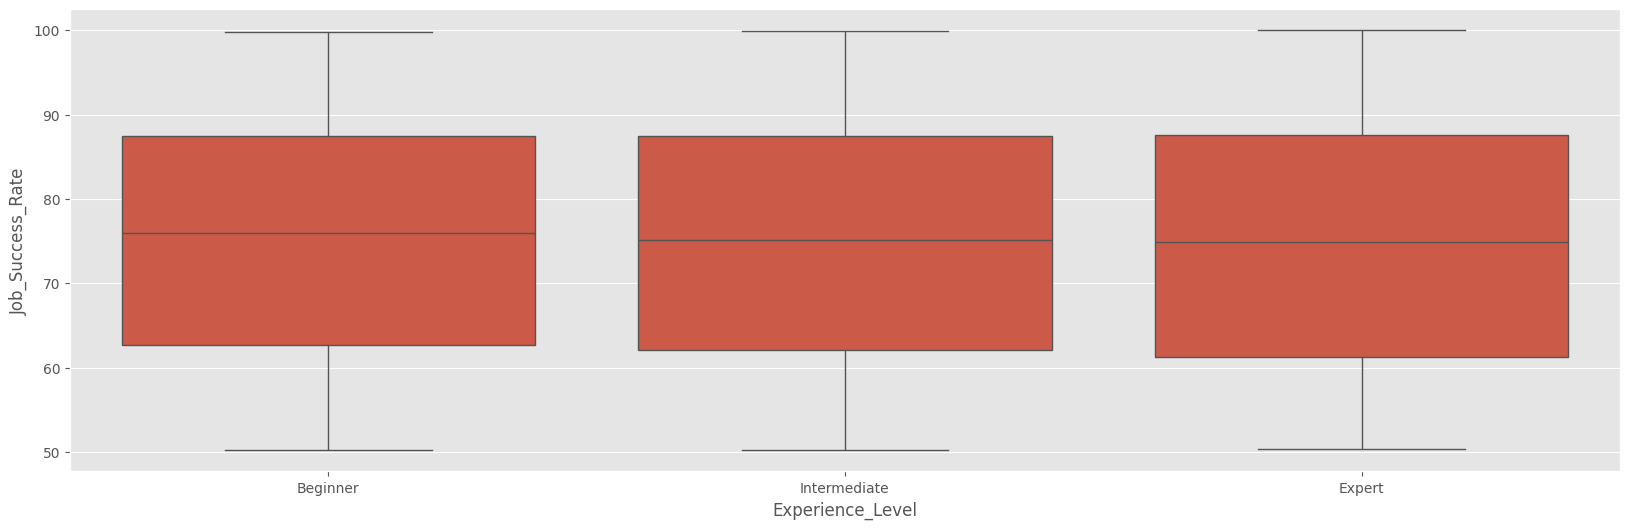

In [11]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Experience_Level', y='Job_Success_Rate', data=df)

De acordo com o gráfico do boxplot, os dados de sucesso do trabalho estão distribuídos de maneira semelhante, tendo em vista o nível de experiência.
Também podemos concluir que não há outliers.
Deste modo, podemos continuar com a análise utilizando a média sem preocupações.

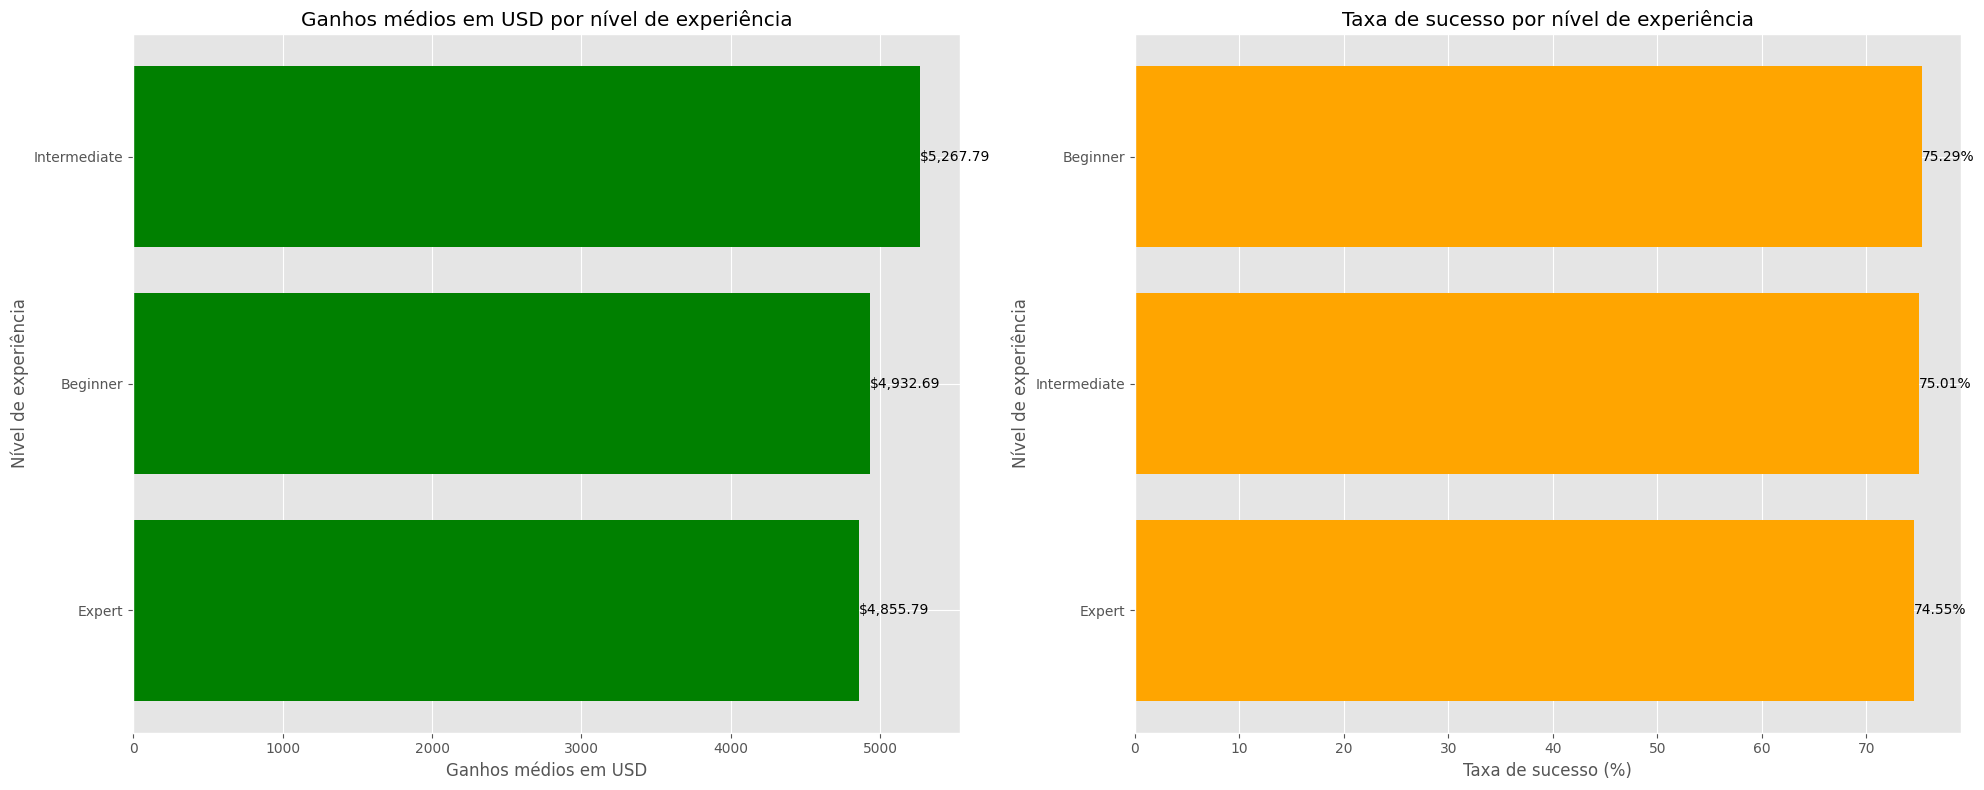

In [12]:
jobsuccessbyexperience = df.groupby('Experience_Level')['Job_Success_Rate'].mean().sort_values(ascending=True)
earnusdbyexperience = df.groupby('Experience_Level')['Earnings_USD'].mean().sort_values(ascending=True)


fig, ax = plt.subplots(1, 2, figsize=(20, 8))


bars1 = ax[0].barh(earnusdbyexperience.index, earnusdbyexperience.values, color='green', label='Ganhos médios em USD')
ax[0].set_title('Ganhos médios em USD por nível de experiência')
ax[0].set_ylabel('Nível de experiência')
ax[0].set_xlabel('Ganhos médios em USD')


for bar in bars1:
    ax[0].text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"${bar.get_width():,.2f}", va='center')


bars2 = ax[1].barh(jobsuccessbyexperience.index, jobsuccessbyexperience.values, color='orange', label='Taxa de sucesso')

ax[1].set_title('Taxa de sucesso por nível de experiência')
ax[1].set_ylabel('Nível de experiência')
ax[1].set_xlabel('Taxa de sucesso (%)')


for bar in bars2:
    ax[1].text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"{bar.get_width():.2f}%", va='center')



plt.tight_layout()


plt.show()


A partir desses gráficos, podemos observar que o nível "Expert" ganha menos em média e também tem a menor taxa de sucesso. Essa é uma observação notável a se fazer, porque intuitivamente o nível "Expert" deveria ser o que mais ganha e o que mais obtém sucesso em seus trabalhos, visto o nível de experiência. Faz-se necessária uma investigação sobre este fenômeno.

Hipóteses:

1. Profissionais de níveis "Beginner" e "Intermediate" aceitam trabalhos menos desafiadores, e por isso a taxa de sucesso é maior;
2. Por serem trabalhos menos desafiadores, levam menos tempo para conclusão e, por conseguinte, tais profissionais se tornam mais produtivos e aumentam seus ganhos médios;
2. Profissionais de nível "Expert" aceitam menos trabalhos.

Para testar essas hipóteses, realizaremos as seguintes análises:

- Distribuição de Ganhos por Hora
- Trabalhos completados 
- Taxa de Sucesso por Tipo de Projeto
- Volume de trabalhos aceitos

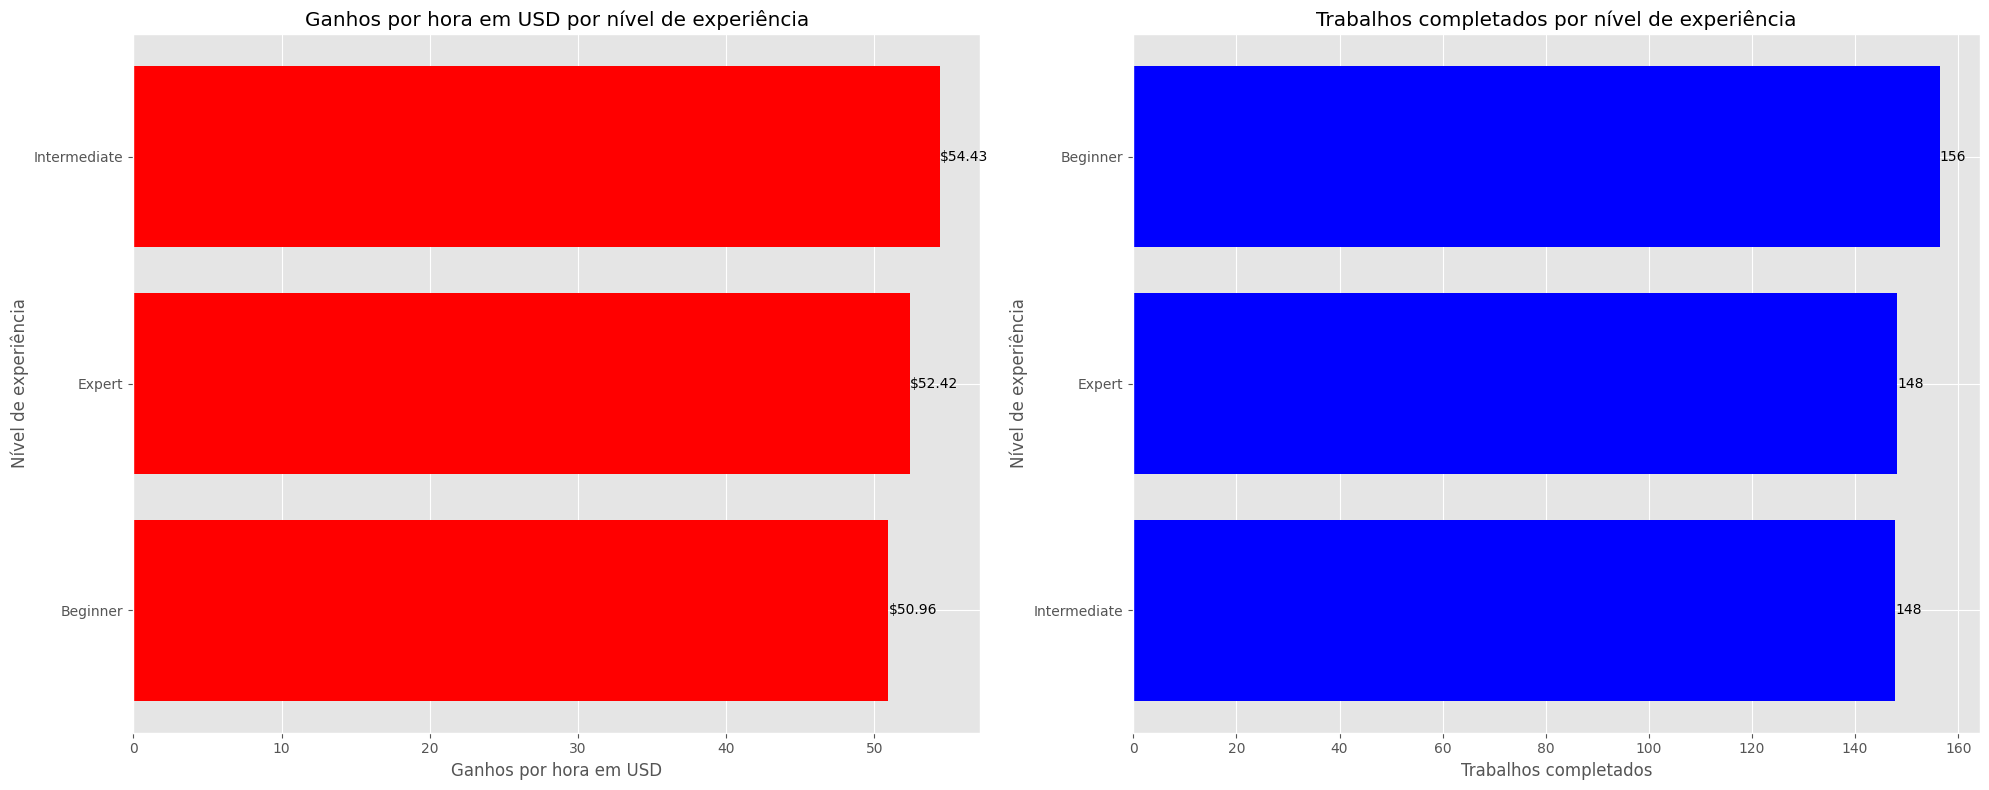

In [13]:
hourlyratebyexperience = df.groupby('Experience_Level')['Hourly_Rate'].mean().sort_values(ascending=True)
jobcompletedbyexperience = df.groupby('Experience_Level')['Job_Completed'].mean().sort_values(ascending=True)

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

bars1 = ax[0].barh(hourlyratebyexperience.index, hourlyratebyexperience.values, color='red', label='Ganhos por hora em USD')

ax[0].set_title('Ganhos por hora em USD por nível de experiência')
ax[0].set_ylabel('Nível de experiência')
ax[0].set_xlabel('Ganhos por hora em USD')

for bar in bars1:
    ax[0].text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"${bar.get_width():,.2f}", va='center')

bars2 = ax[1].barh(jobcompletedbyexperience.index, jobcompletedbyexperience.values, color='blue', label='Trabalhos completados')

ax[1].set_title('Trabalhos completados por nível de experiência')
ax[1].set_ylabel('Nível de experiência')
ax[1].set_xlabel('Trabalhos completados')

for bar in bars2:
    ax[1].text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"{bar.get_width():.0f}", va='center')


plt.tight_layout()


plt.show()

Os freelancers iniciantes completam mais trabalhos, e os intermediários e experts empatam neste quesito.<br>
**O fato dos freelancers iniciantes completarem mais trabalhos pode estar relacionado com o maior ganho bruto em USD anteriormente observado.**<br>
<br>Quanto aos ganhos por hora, os freelancers intermediários superam os experts. Por que isso acontece?<br>
Vamos explorar a diferença da quantidade de freelancers x ganhos entre as plataformas:

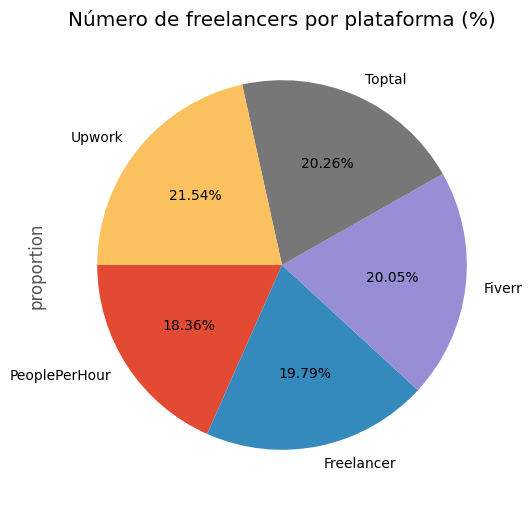

In [14]:
countbyplatform = df['Platform'].value_counts(1).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
ax = countbyplatform.plot(kind='pie', autopct='%1.2f%%', startangle=180)
plt.title('Número de freelancers por plataforma (%)')
plt.show()

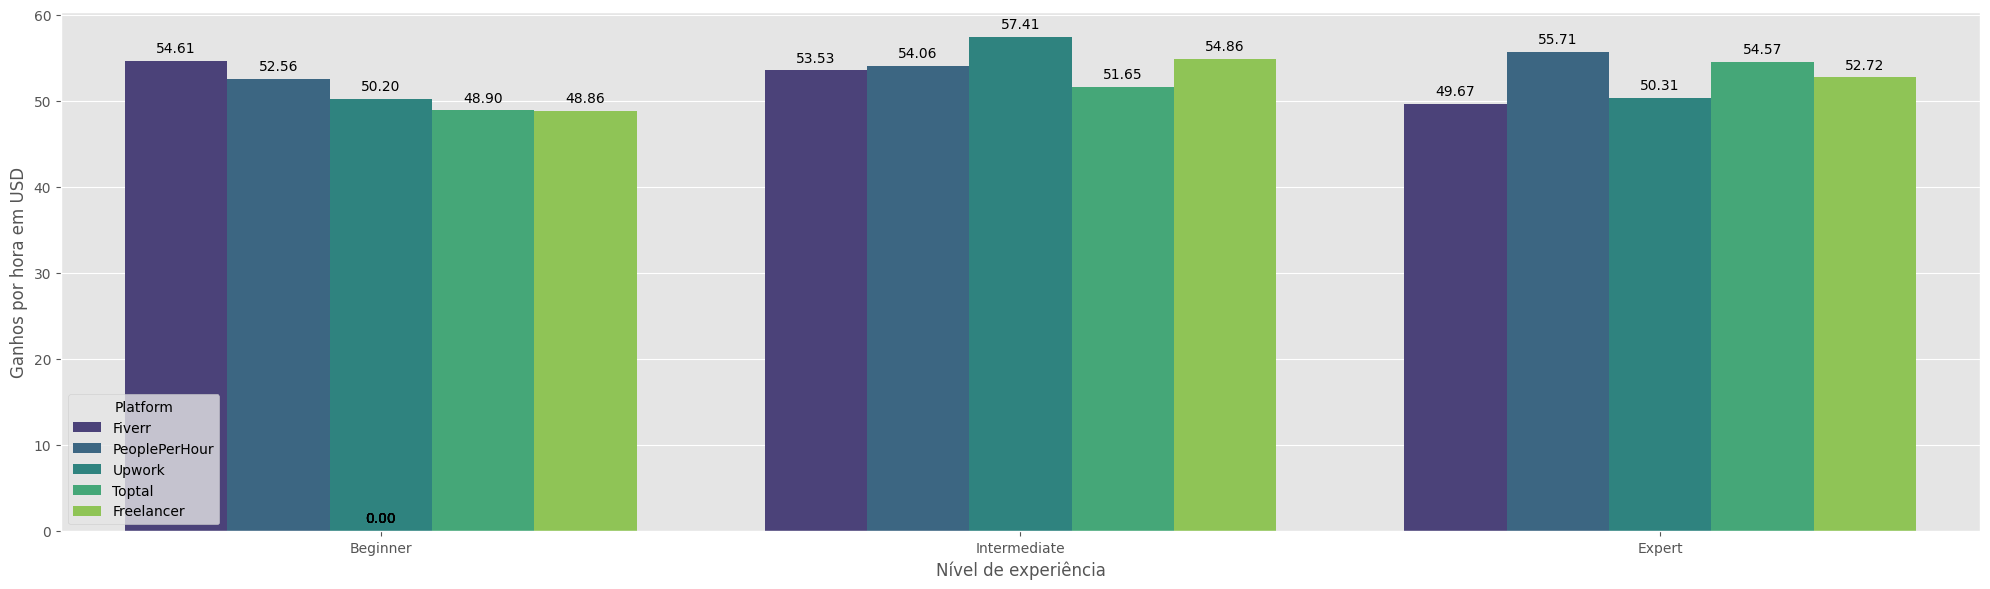

In [15]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='Experience_Level', y='Hourly_Rate', data=df, estimator="average", errorbar=None, hue="Platform", palette='viridis')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.xlabel('Nível de experiência')
plt.ylabel('Ganhos por hora em USD')
plt.tight_layout()
plt.show()

A plataforma upwork é a que há mais freelancers na amostra, e também a plataforma que mais paga os freelancers intermediários.
- O ganho por hora dos freelancers intermediários na plataforma upwork é o maior entre os níveis de experiência
- Para o nível Expert, a plataforma que melhor valoriza esses profissionais é a "PeoplePerHour"
- Para o nível Beginner, a melhor oportunidade está na "Fiverr"


Freelancers que trabalham com projetos por hora ganham mais do que os que trabalham com preço fixo? Vamos checar.

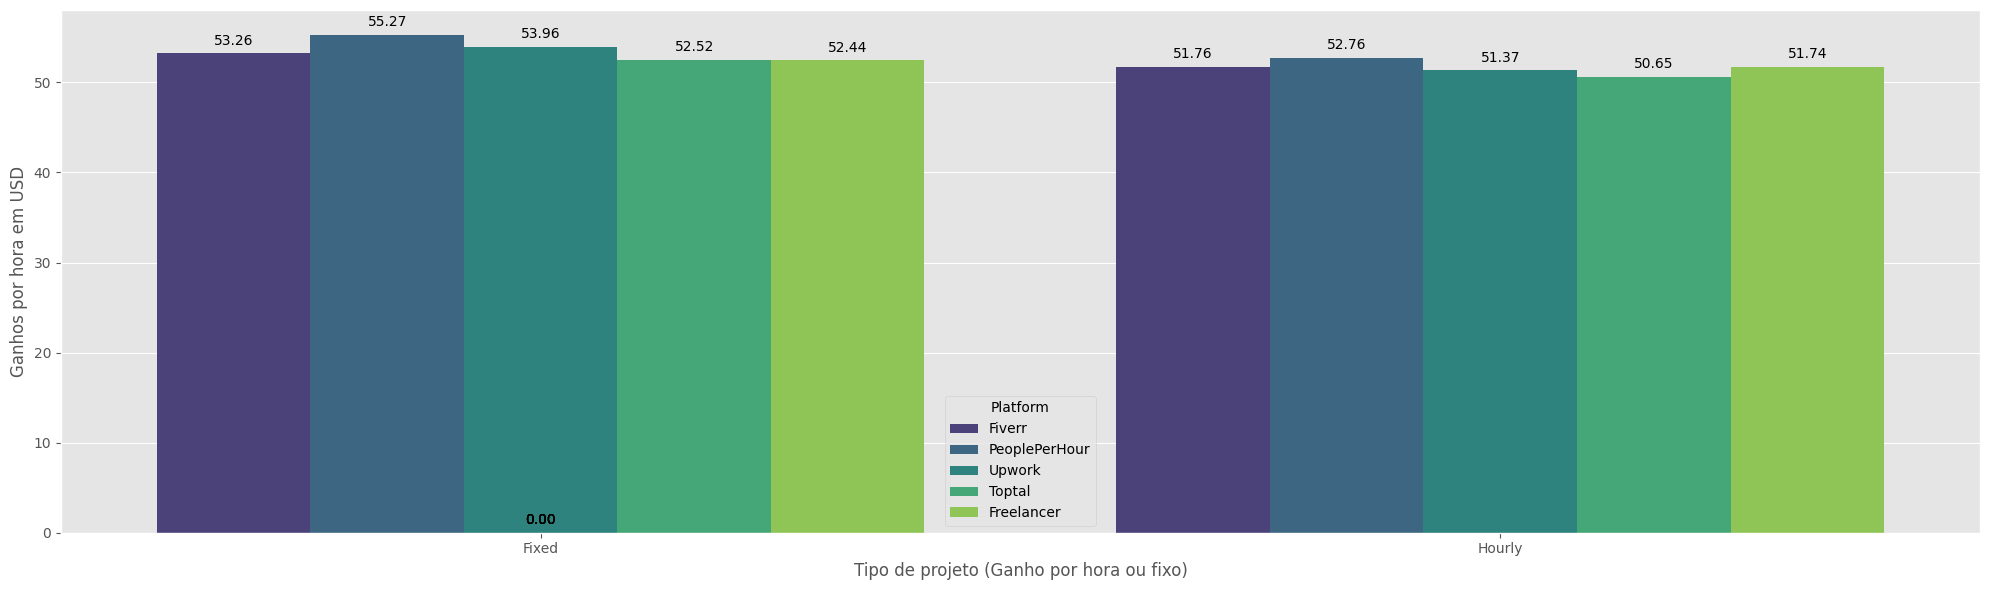

In [16]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='Project_Type', y='Hourly_Rate', data=df, estimator="average", errorbar=None, hue="Platform", palette='viridis')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.xlabel('Tipo de projeto (Ganho por hora ou fixo)')
plt.ylabel('Ganhos por hora em USD')
plt.tight_layout()

Podemos concluir que, independente da plataforma, os ganhos por hora são ligeraimente maiores em projetos com contratos fixos.

# Verificação de correlações

Vamos verificar se os dados numéricos possuem alguma correlação.

<Axes: >

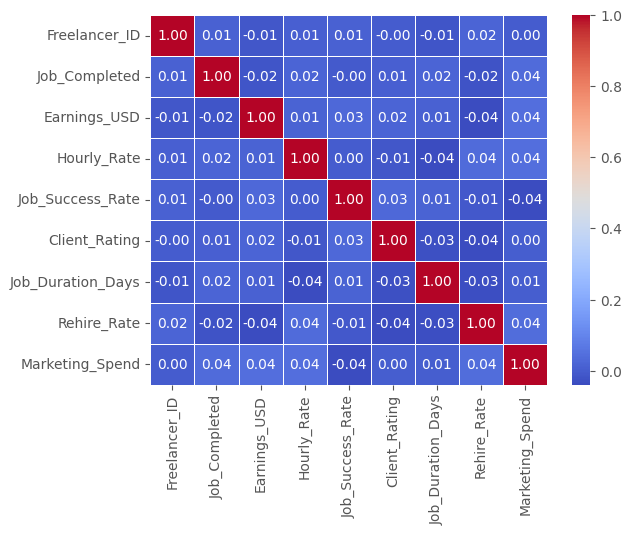

In [17]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

De acordo com a correlação de Pearson, os dados possuem uma correlação insignificante. Vamos demonstrar isso com gráficos de dispersão fazendo os seguintes questionamentos:

1. Projetos mais longos resultam em maiores ganhos?
2. Existe alguma relação entre a duração do projeto e a taxa do sucesso do trabalho / satisfação do cliente?

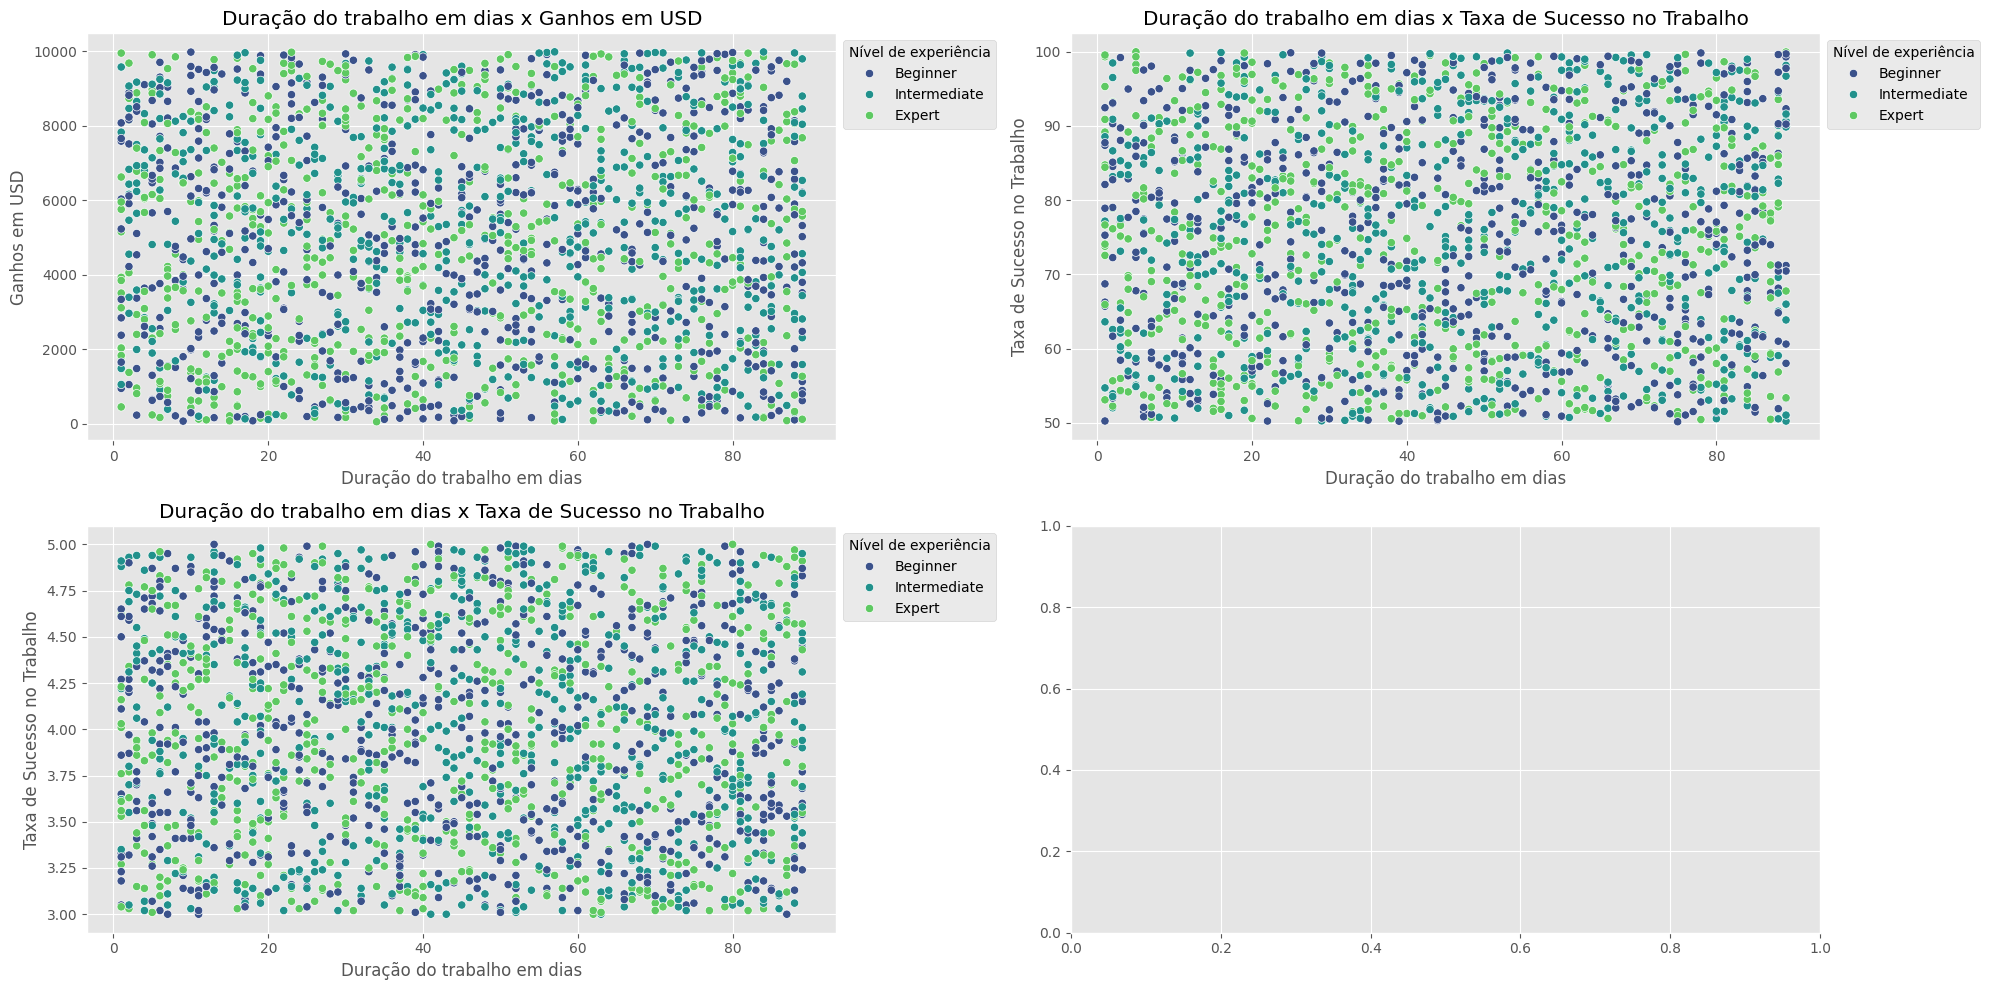

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10)) 

sns.scatterplot(x='Job_Duration_Days', y='Earnings_USD', data=df, hue='Experience_Level', palette='viridis', ax=ax[0, 0])
ax[0, 0].set_title('Duração do trabalho em dias x Ganhos em USD')
ax[0, 0].legend(title='Nível de experiência', bbox_to_anchor=(1, 1))
ax[0, 0].set_xlabel('Duração do trabalho em dias')
ax[0, 0].set_ylabel('Ganhos em USD')

sns.scatterplot(x='Job_Duration_Days', y='Job_Success_Rate', data=df, hue='Experience_Level', palette='viridis', ax=ax[0, 1])
ax[0, 1].set_title('Duração do trabalho em dias x Taxa de Sucesso no Trabalho')
ax[0, 1].legend(title='Nível de experiência', bbox_to_anchor=(1, 1))
ax[0, 1].set_xlabel('Duração do trabalho em dias')
ax[0, 1].set_ylabel('Taxa de Sucesso no Trabalho')

sns.scatterplot(x='Job_Duration_Days', y='Client_Rating', data=df, hue='Experience_Level', palette='viridis', ax=ax[1, 0])
ax[1, 0].legend(title='Nível de experiência', bbox_to_anchor=(1, 1))
ax[1, 0].set_title('Duração do trabalho em dias x Taxa de Sucesso no Trabalho')
ax[1, 0].set_xlabel('Duração do trabalho em dias')
ax[1, 0].set_ylabel('Taxa de Sucesso no Trabalho')

plt.tight_layout()  
plt.show()




Os dados desse dataset não possuem correlações significativas.

# Conclusões

- As plataformas oferecem diferentes oportunidades de acordo com os níveis de experiência.
- Os ganhos médios e taxa de sucesso não estão diretamente relacionados com o nível de experiência
- Os freelancers do nível "Beginner" possuem um volume de trabalhos completos maior, o que gera um maior ganho.
- Os dados do dataset são limpos, não possuem outliers e não possuem correlação entre si, o que indica que são dados artificialmente gerados.